## Degue vs Environmental Analysis.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Check version
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 1.3.2
numpy version: 1.20.3
seaborn version: 0.11.2
sklearn version: 0.24.2


### Input Data from CSV file.

In [3]:
# Read in Data set
df= pd.read_csv('dengue_preprocessing.csv',header= 0,encoding= 'unicode_escape')

In [4]:
df = df.drop(columns=['province', 'year'])

In [5]:
df.describe()

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,3.000000,39.000000,122.929870,1543.319740,74.789351,39.460260,14.781299,27.875455,1.358442,0.090000,1404.485714
std,1.416054,22.255032,30.138271,774.967638,4.380409,2.236733,3.899928,1.024079,2.354370,0.126734,1363.167218
min,1.000000,1.000000,75.000000,513.200000,63.900000,24.000000,0.600000,23.600000,0.000000,0.000000,62.000000
25%,2.000000,20.000000,101.000000,1023.500000,71.400000,37.900000,11.600000,27.300000,0.000000,0.000000,510.000000
50%,3.000000,39.000000,114.000000,1308.700000,74.300000,39.700000,14.800000,27.900000,1.000000,0.040000,938.000000
75%,4.000000,58.000000,141.000000,1794.900000,77.700000,41.200000,18.200000,28.600000,2.000000,0.140000,1821.000000
max,5.000000,77.000000,220.000000,5287.300000,85.000000,43.400000,23.400000,31.300000,19.000000,0.880000,8279.000000


In [6]:
df.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'dead',
       'dead_perc', 'patient'],
      dtype='object')

In [7]:
# Transformation
df_num  = df[['day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg', 'dead', 'dead_perc']]

In [8]:
# Choice of Numerical varialable.

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Version1: select MinMax

num_column = df_num.dtypes[df_num.dtypes != 'object'].index

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

std_transform_feat = pd.DataFrame(data = df_num)
std_transform_feat[num_column] = scaler.fit_transform(df_num[num_column])

# Show an example of a record with scaling applied
display(std_transform_feat.tail())

,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc
380,0.248276,0.094531,0.218009,0.855670,0.535088,0.402597,0.000000,0.000000
381,0.172414,0.147588,0.270142,0.953608,0.504386,0.480519,0.052632,0.045455
382,0.075862,0.120002,0.170616,0.979381,0.587719,0.636364,0.052632,0.193182
383,0.117241,0.060870,0.355450,0.953608,0.649123,0.694805,0.000000,0.000000
384,0.248276,0.226619,0.218009,0.855670,0.596491,0.493506,0.157895,0.159091


In [10]:
# log transform to target variable impove RMSE value.

#df['patient'] = np.log(df['patient'])

In [11]:
df_cat = df[['year_num', 'province_num']]
y_tar = df[['patient']]

In [12]:
# Concat all numerical feature to DataFrame
df_pre = pd.concat((df_cat, std_transform_feat,y_tar),axis=1)

In [13]:
df_pre.describe().round(2)

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
count,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00
mean,3.00,39.00,0.33,0.22,0.52,0.80,0.62,0.56,0.07,0.10,1404.49
std,1.42,22.26,0.21,0.16,0.21,0.12,0.17,0.13,0.12,0.14,1363.17
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,62.00
25%,2.00,20.00,0.18,0.11,0.36,0.72,0.48,0.48,0.00,0.00,510.00
50%,3.00,39.00,0.27,0.17,0.49,0.81,0.62,0.56,0.05,0.05,938.00
75%,4.00,58.00,0.46,0.27,0.65,0.89,0.77,0.65,0.11,0.16,1821.00
max,5.00,77.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8279.00


# Building Linear Regression Model

1. Selecting features for Polynomial Regression Model
2. Train Test Split or CV
3. Creating and Training the Model
4. Model Evaluation


## Selecting features for Polynomial Regression Model

In [14]:
df_pre.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'dead',
       'dead_perc', 'patient'],
      dtype='object')

In [15]:
X = df_pre[['year_num', 'province_num', 'day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg', 'dead', 'dead_perc']]
y = df_pre['patient']

# 'year_num', 'province_num', 'day_raindrop', 'quant_rain', 'humbidity_perc',

## Train Test Split

This step we will separate data to train (training set) and test (testing set)
* training set use for train model 
* testing set use for  test model or call that Evaluation 


In [16]:
from sklearn.model_selection import train_test_split

# Train dataset X0% and Test dataset X0%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

### K-folds Cross varidation (optional)

from sklearn.model_selection import RepeatedKFold 

kf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=0) 

for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
        
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

In [17]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

## Creating and Training the Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
X_test_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)

In [19]:
# Try to use simple model: Linear Regression.
model = LinearRegression().fit(X_train_poly, y_train)

## Model Evaluation

evaluate model by visit coefficients of each item

In [20]:
r_sq = model.score(X_train_poly, y_train)
print('coefficient of determination(R_squar_score):', r_sq)

coefficient of determination(R_squar_score): 0.8341915411193735


In [21]:
print('intercept:', model.intercept_)

intercept: 8478.313860334949


## Predictions from our Model

In [22]:
# Predicting 
predictions = model.predict(X_test_poly)

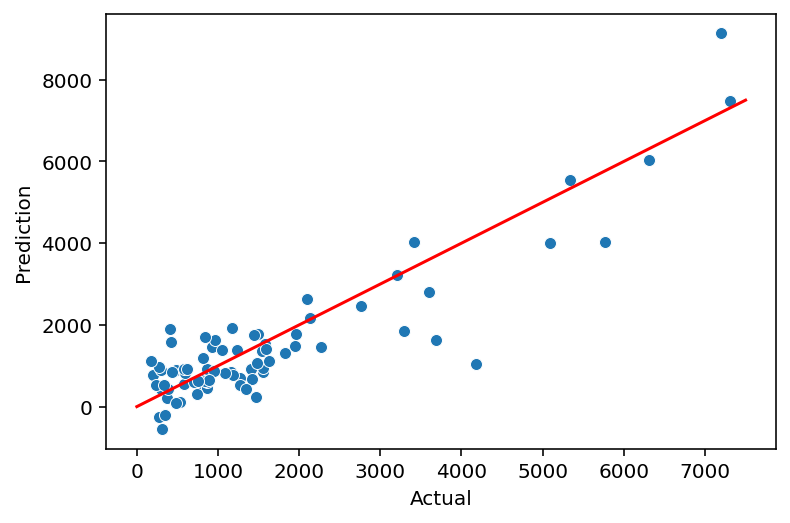

In [30]:
# plot predictions against actual

plot_k = sns.scatterplot(y_test,predictions)
plot_k.set(xlabel='Actual', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,7500,10000)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')
plt.show()

# Simulate linear line

## Prediction

### Actual value and the predicted value

In [24]:
# Province 
province = pd.Series(['Pattalung','Nakornsrithamarat','Pang-Nga','Surin','Rayong','Prachinburi','Udonthani','Songkhla',
           'Lamphoon','Nongbualamphu','Samutsongkram','Nakornrachasrima','Ubonrachathani','Kanjanaburi',
           'Trang','Nakornprathom','Nakornprathom','Narathiwat','Amnajcharean','Singburi','Pattalung'])
pv = pd.DataFrame(province, columns=["Province"])

In [25]:
# Years 2016-2020
year = pd.Series(['2016','2020','2019','2019','2020','2017','2018','2017','2017','2016','2018','2016','2020','2020',
                  '2020','2017','2018','2017','2020','2020','2017'])
years = pd.DataFrame(year, columns=["Year"])

In [26]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions})

In [27]:
# Show 21 samples to compare Actual value and the predicted value
result = pd.concat([pv,years,mlr_diff],axis=1)
result.head(21)

,Province,Year,Actual value,Predicted value
0,Pattalung,2016,837,670.859924
1,Nakornsrithamarat,2020,3419,4024.796426
2,Pang-Nga,2019,929,1467.842953
3,Surin,2019,3600,2796.975016
4,Rayong,2020,1155,853.749229
5,Prachinburi,2017,295,442.073246
6,Udonthani,2018,1542,1350.976802
7,Songkhla,2017,7314,7472.123127
8,Lamphoon,2017,271,-244.214709
9,Nongbualamphu,2016,1557,845.457907


**Residual Histogram**

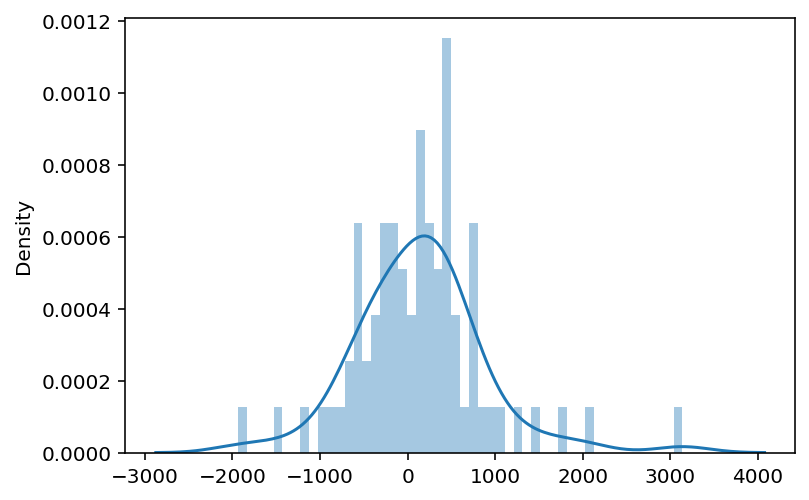

In [28]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Evaluation metrics for regression problems as below:

**Coefficient of determination(R2 score)** is used to evaluate the performance of a linear regression model. 
It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

$$R2= 1- SSres  /  SStot$$

**Mean Absolute Error** (MAE): the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE): the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE): the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Comparison:**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [31]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print('R squared of Training Set: {:.2f}'.format(model.score(X_train_poly,y_train)))
print('R squared of Test Set: {:.2f}'.format(model.score(X_test_poly,y_test)))
print('Mean Absolute Error (MAE): {:.4f}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

R squared of Training Set: 0.83
R squared of Test Set: 0.78
Mean Absolute Error (MAE): 544.9456
Root Mean Squared Error (RMSE): 753.6509
